In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure
#print(os.listdir("../input"))
#set seed
np.random.seed(12345) # receive the same random numbers each execution
print('setup complete')

setup complete


# Data Pre-processing

In [2]:
#notclean = pd.read_csv("add file path\LM_10X_Summaries_2018.csv")
notclean.head()

,CIK,FILING_DATE,FYE,FORM_TYPE,FILE_NAME,SIC,FFInd,N_Words,N_Unique_Words,N_Negative,...,N_Constraining,N_Negation,GrossFileSize,NetFileSize,NonTextDocTypeChars,HTMLChars,XBRLChars,XMLChars,N_Tables,N_Exhibits
0,60512,19930813,19930630,10-Q,D:/Edgar/10-X_C\1993\QTR3\19930813_10-Q_edgar_...,1311,30,3037,700,68,...,6,1,63255,25233,0,186,0,0,7,0
1,66740,19930813,19930630,10-Q,D:/Edgar/10-X_C\1993\QTR3\19930813_10-Q_edgar_...,2670,38,4102,823,53,...,7,3,57283,47739,0,317,0,0,2,3
2,60512,19931007,19921231,10-K-A,D:/Edgar/10-X_C\1993\QTR4\19931007_10-K-A_edga...,1311,30,7278,1184,157,...,26,5,114136,56958,0,276,0,0,22,0
3,60512,19931110,19930930,10-Q,D:/Edgar/10-X_C\1993\QTR4\19931110_10-Q_edgar_...,1311,30,3768,739,69,...,3,1,72062,31256,0,201,0,0,8,0
4,11860,19931112,19930930,10-Q,D:/Edgar/10-X_C\1993\QTR4\19931112_10-Q_edgar_...,3312,19,3822,897,77,...,32,2,40392,39056,0,201,0,0,0,0


In [3]:
lm_10X = notclean.drop(['CIK','FILE_NAME', 'SIC', 'FFInd', 'NonTextDocTypeChars', 'HTMLChars', 'XBRLChars', 'XMLChars'], axis=1)
lm_10X.head()

,FILING_DATE,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
0,19930813,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1,19930813,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
2,19931007,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
3,19931110,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
4,19931112,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [4]:
lm_10X['FILING_DATE'] = pd.to_datetime(lm_10X['FILING_DATE'], format='%Y%m%d')
#lm_10X['FYE'] = pd.to_datetime(lm_10X['FYE'], format='%Y%m%d')
lm_10X.head()

,FILING_DATE,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
0,1993-08-13,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1,1993-08-13,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
2,1993-10-07,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
3,1993-11-10,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
4,1993-11-12,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [6]:
lm_10X = lm_10X.set_index(pd.DatetimeIndex(lm_10X['FILING_DATE']))
lm_10X = lm_10X.drop(['FILING_DATE'], axis=1)
lm_10X.head()

,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
FILING_DATE,,,,,,,,,,,,,,,,,
1993-08-13,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [7]:
dfn = pd.read_csv("Z:\Dokumente\Studium\Bachelorthesis\VIX_2004-present.csv")
dfn.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [8]:
dfo = pd.read_csv("Z:\Dokumente\Studium\Bachelorthesis\VIX_1990-2003.csv")
dfo.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,01/02/1990,NaN,NaN,NaN,17.24
1,01/03/1990,NaN,NaN,NaN,18.19
2,01/04/1990,NaN,NaN,NaN,19.22
3,01/05/1990,NaN,NaN,NaN,20.11
4,01/08/1990,NaN,NaN,NaN,20.26


In [9]:
frames = [dfo, dfn]
vix = pd.concat(frames)

In [10]:
vix

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,01/02/1990,NaN,NaN,NaN,17.24
1,01/03/1990,NaN,NaN,NaN,18.19
2,01/04/1990,NaN,NaN,NaN,19.22
3,01/05/1990,NaN,NaN,NaN,20.11
4,01/08/1990,NaN,NaN,NaN,20.26
5,01/09/1990,NaN,NaN,NaN,22.20
6,01/10/1990,NaN,NaN,NaN,22.44
7,01/11/1990,NaN,NaN,NaN,20.05
8,01/12/1990,NaN,NaN,NaN,24.64
9,01/15/90,NaN,NaN,NaN,26.34


In [11]:
vix.index = pd.to_datetime(vix.index)
vix = vix.set_index('Date')
vix.head()

,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,
01/02/1990,NaN,NaN,NaN,17.24
01/03/1990,NaN,NaN,NaN,18.19
01/04/1990,NaN,NaN,NaN,19.22
01/05/1990,NaN,NaN,NaN,20.11
01/08/1990,NaN,NaN,NaN,20.26


In [12]:
lm_10X_vix = pd.merge(vix, lm_10X, how='inner', left_index=True, right_index=True)
lm_10X_vix.head()

,VIX Open,VIX High,VIX Low,VIX Close,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,...,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
1993-08-13,12.80,13.25,12.17,12.19,19930630,10-Q,3037,700,68,6,...,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,12.80,13.25,12.17,12.19,19930630,10-Q,4102,823,53,24,...,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,12.65,13.56,12.44,13.14,19921231,10-K-A,7278,1184,157,41,...,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,13.18,14.34,12.99,13.72,19930930,10-Q,3768,739,69,13,...,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,14.47,14.61,12.99,13.33,19930930,10-Q,3822,897,77,39,...,60,5,12,19,32,2,40392,39056,0,0


In [12]:
lm_10X_vix

,VIX Open,VIX High,VIX Low,VIX Close,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,...,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
1993-08-13,12.80,13.25,12.17,12.19,19930630,10-Q,3037,700,68,6,...,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,12.80,13.25,12.17,12.19,19930630,10-Q,4102,823,53,24,...,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,12.65,13.56,12.44,13.14,19921231,10-K-A,7278,1184,157,41,...,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,13.18,14.34,12.99,13.72,19930930,10-Q,3768,739,69,13,...,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,14.47,14.61,12.99,13.33,19930930,10-Q,3822,897,77,39,...,60,5,12,19,32,2,40392,39056,0,0
1993-11-12,14.47,14.61,12.99,13.33,19930930,10-Q,3450,848,67,29,...,43,9,8,4,23,3,51625,28738,11,0
1993-11-12,14.47,14.61,12.99,13.33,19930930,10-Q,3767,791,49,28,...,31,8,10,7,8,1,51346,41630,2,3
1993-11-29,13.39,14.65,13.39,14.12,19930831,10-K,18063,1942,196,103,...,281,53,42,48,88,14,278174,159453,35,2
1993-12-13,9.70,11.51,9.65,10.98,19930930,10-K,12826,1473,61,68,...,132,20,34,65,91,2,166496,117190,12,1
1993-12-14,10.71,11.23,10.64,11.13,19931030,10-Q,1741,463,35,11,...,15,2,8,5,9,1,28487,15442,6,0


In [13]:
lm_10X_vix = lm_10X_vix.drop(['FYE','FORM_TYPE','GrossFileSize', 'NetFileSize', 'N_Tables', 'N_Exhibits'], axis=1)
lm_10X_vix.head()

,VIX Open,VIX High,VIX Low,VIX Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,12.80,13.25,12.17,12.19,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,12.80,13.25,12.17,12.19,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,12.65,13.56,12.44,13.14,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,13.18,14.34,12.99,13.72,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,14.47,14.61,12.99,13.33,3822,897,77,39,23,60,5,12,19,32,2


In [14]:
lm_10X_vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1022399 entries, 1993-08-13 to 2018-12-31
Data columns (total 15 columns):
VIX Open            1022399 non-null float64
VIX High            1022399 non-null float64
VIX Low             1022399 non-null float64
VIX Close           1022399 non-null float64
N_Words             1022399 non-null int64
N_Unique_Words      1022399 non-null int64
N_Negative          1022399 non-null int64
N_Positive          1022399 non-null int64
N_Uncertainty       1022399 non-null int64
N_Litigious         1022399 non-null int64
N_ModalWeak         1022399 non-null int64
N_Modal_Moderate    1022399 non-null int64
N_Modal_Strong      1022399 non-null int64
N_Constraining      1022399 non-null int64
N_Negation          1022399 non-null int64
dtypes: float64(4), int64(11)
memory usage: 124.8 MB


# Exploratory Analysis

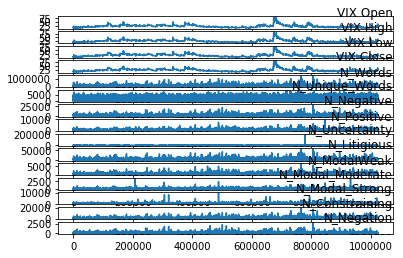

In [14]:
values = lm_10X_vix.values
groups = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(lm_10X_vix.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [15]:
lm_10X_vix.describe()

,VIX Open,VIX High,VIX Low,VIX Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
count,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06,1.022399e+06
mean,2.065154e+01,2.144118e+01,1.987366e+01,2.056038e+01,1.813373e+04,1.535124e+03,2.994578e+02,1.109865e+02,2.014694e+02,3.312831e+02,8.424439e+01,4.940847e+01,5.629474e+01,1.411634e+02,1.522111e+01
std,8.183454e+00,8.626059e+00,7.747308e+00,8.197397e+00,2.612524e+04,9.048182e+02,4.846639e+02,1.651005e+02,3.328560e+02,8.452458e+02,1.412373e+02,6.107776e+01,9.162679e+01,2.672695e+02,3.170101e+01
min,9.010000e+00,9.310000e+00,8.560000e+00,9.140000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.454000e+01,1.511000e+01,1.387000e+01,1.441000e+01,4.508000e+03,8.420000e+02,5.400000e+01,2.000000e+01,4.200000e+01,3.000000e+01,1.100000e+01,1.200000e+01,1.100000e+01,2.400000e+01,3.000000e+00
50%,1.926000e+01,1.980000e+01,1.850000e+01,1.919000e+01,1.019000e+04,1.352000e+03,1.360000e+02,5.400000e+01,1.090000e+02,8.500000e+01,3.000000e+01,3.000000e+01,2.800000e+01,6.100000e+01,7.000000e+00
75%,2.457000e+01,2.554000e+01,2.383000e+01,2.452000e+01,2.141700e+04,2.042000e+03,3.450000e+02,1.340000e+02,2.500000e+02,2.730000e+02,9.400000e+01,6.300000e+01,6.800000e+01,1.510000e+02,1.500000e+01
max,8.074000e+01,8.953000e+01,7.276000e+01,8.086000e+01,1.407044e+06,8.316000e+03,2.900000e+04,9.674000e+03,2.016710e+05,5.640400e+04,6.347000e+03,3.545000e+03,9.901000e+03,2.052100e+04,2.891000e+03


In [16]:
cor = lm_10X_vix.corr()
cor

,VIX Open,VIX High,VIX Low,VIX Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
VIX Open,1.000000,0.991336,0.994522,0.986040,-0.043669,-0.065789,-0.042979,-0.042657,-0.051631,-0.011700,-0.055741,-0.067118,-0.030289,-0.038700,-0.021881
VIX High,0.991336,1.000000,0.989762,0.993968,-0.037282,-0.055887,-0.037024,-0.036013,-0.044579,-0.009395,-0.048903,-0.057644,-0.025107,-0.033418,-0.018408
VIX Low,0.994522,0.989762,1.000000,0.992550,-0.047530,-0.072431,-0.047106,-0.047104,-0.057159,-0.011712,-0.061077,-0.074567,-0.033585,-0.042036,-0.023286
VIX Close,0.986040,0.993968,0.992550,1.000000,-0.039824,-0.060518,-0.039810,-0.038917,-0.048585,-0.009013,-0.052649,-0.063015,-0.027060,-0.035707,-0.019094
N_Words,-0.043669,-0.037282,-0.047530,-0.039824,1.000000,0.809176,0.959046,0.939095,0.722641,0.914601,0.891006,0.878841,0.849370,0.956559,0.889830
N_Unique_Words,-0.065789,-0.055887,-0.072431,-0.060518,0.809176,1.000000,0.792853,0.830639,0.687657,0.616032,0.801120,0.849352,0.733281,0.716785,0.647478
N_Negative,-0.042979,-0.037024,-0.047106,-0.039810,0.959046,0.792853,1.000000,0.916026,0.711398,0.894608,0.887893,0.859560,0.835784,0.926877,0.905426
N_Positive,-0.042657,-0.036013,-0.047104,-0.038917,0.939095,0.830639,0.916026,1.000000,0.727968,0.804764,0.896274,0.891294,0.842786,0.871108,0.795171
N_Uncertainty,-0.051631,-0.044579,-0.057159,-0.048585,0.722641,0.687657,0.711398,0.727968,1.000000,0.554878,0.757004,0.755838,0.640024,0.661037,0.559372
N_Litigious,-0.011700,-0.009395,-0.011712,-0.009013,0.914601,0.616032,0.894608,0.804764,0.554878,1.000000,0.757007,0.663887,0.730060,0.920254,0.937907


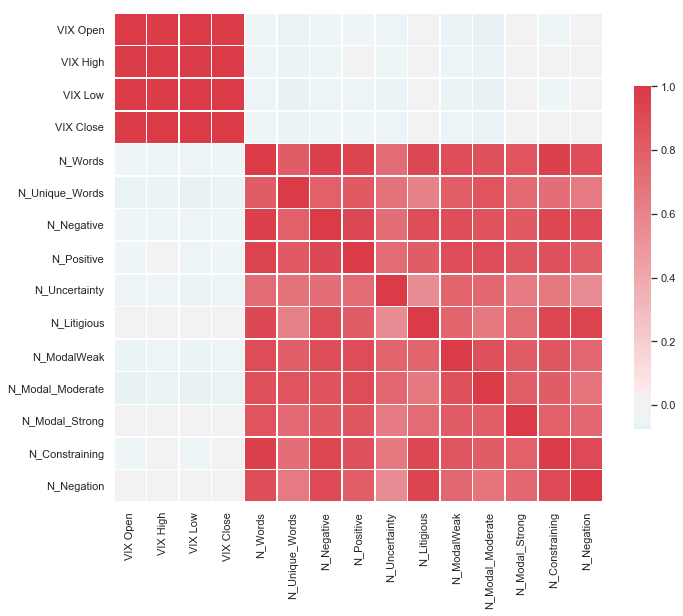

In [17]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

C:\Users\Dennis Thumm\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


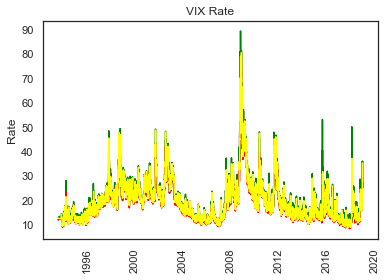

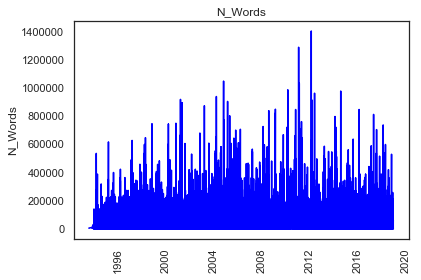

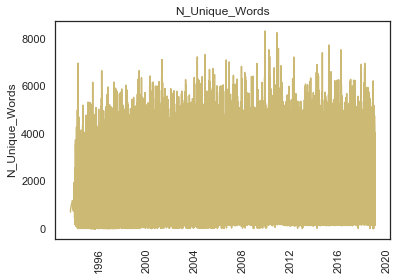

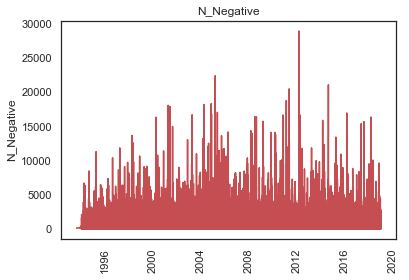

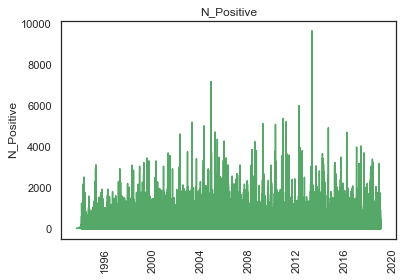

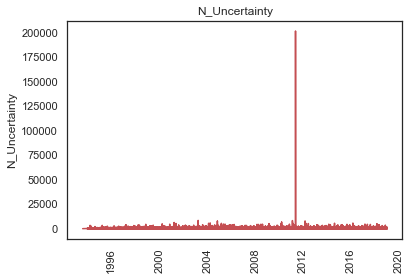

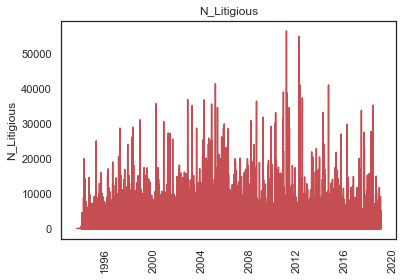

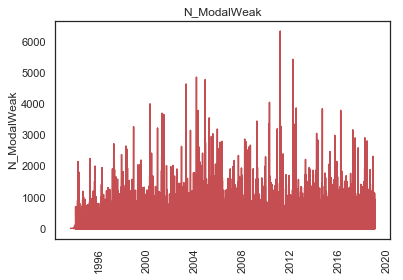

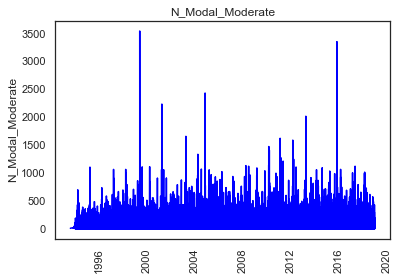

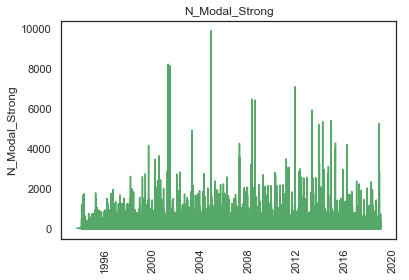

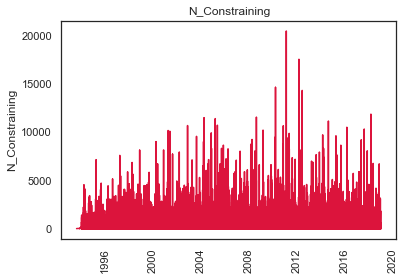

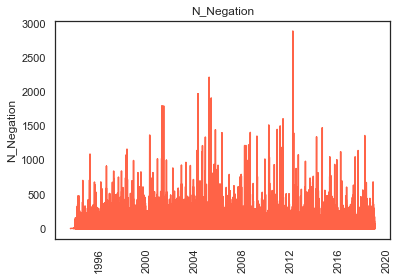

In [19]:
plt.plot(lm_10X_vix.index, lm_10X_vix['VIX Close'], 'black')
plt.plot(lm_10X_vix.index, lm_10X_vix['VIX High'], 'green')
plt.plot(lm_10X_vix.index, lm_10X_vix['VIX Low'], 'red')
plt.plot(lm_10X_vix.index, lm_10X_vix['VIX Open'], 'yellow')
plt.title('VIX Rate')
plt.xticks(rotation='vertical')
plt.ylabel('Rate');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Words'], 'blue')
plt.title('N_Words')
plt.xticks(rotation='vertical')
plt.ylabel('N_Words');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Unique_Words'], 'y')
plt.title('N_Unique_Words')
plt.xticks(rotation='vertical')
plt.ylabel('N_Unique_Words');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Negative'], 'r')
plt.title('N_Negative')
plt.xticks(rotation='vertical')
plt.ylabel('N_Negative');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Positive'], 'g')
plt.title('N_Positive')
plt.xticks(rotation='vertical')
plt.ylabel('N_Positive');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Uncertainty'], 'r')
plt.title('N_Uncertainty')
plt.xticks(rotation='vertical')
plt.ylabel('N_Uncertainty');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Litigious'], 'r')
plt.title('N_Litigious')
plt.xticks(rotation='vertical')
plt.ylabel('N_Litigious');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_ModalWeak'], 'r')
plt.title('N_ModalWeak')
plt.xticks(rotation='vertical')
plt.ylabel('N_ModalWeak');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Modal_Moderate'], 'blue')
plt.title('N_Modal_Moderate')
plt.xticks(rotation='vertical')
plt.ylabel('N_Modal_Moderate');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Modal_Strong'], 'g')
plt.title('N_Modal_Strong')
plt.xticks(rotation='vertical')
plt.ylabel('N_Modal_Strong');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Constraining'], 'crimson')
plt.title('N_Constraining')
plt.xticks(rotation='vertical')
plt.ylabel('N_Constraining');
plt.show();

plt.plot(lm_10X_vix.index, lm_10X_vix['N_Negation'], 'tomato')
plt.title('N_Negation')
plt.xticks(rotation='vertical')
plt.ylabel('N_Negation');
plt.show();
#plt.legend()

In [18]:
#LSTM Prep
df = lm_10X_vix
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1022399 entries, 1993-08-13 to 2018-12-31
Data columns (total 15 columns):
VIX Open            1022399 non-null float64
VIX High            1022399 non-null float64
VIX Low             1022399 non-null float64
VIX Close           1022399 non-null float64
N_Words             1022399 non-null int64
N_Unique_Words      1022399 non-null int64
N_Negative          1022399 non-null int64
N_Positive          1022399 non-null int64
N_Uncertainty       1022399 non-null int64
N_Litigious         1022399 non-null int64
N_ModalWeak         1022399 non-null int64
N_Modal_Moderate    1022399 non-null int64
N_Modal_Strong      1022399 non-null int64
N_Constraining      1022399 non-null int64
N_Negation          1022399 non-null int64
dtypes: float64(4), int64(11)
memory usage: 124.8 MB


In [19]:
df = df.drop(['VIX Open', 'VIX High', 'VIX Low'], axis=1)
df.head()

,VIX Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,12.19,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,12.19,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,13.14,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,13.72,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,13.33,3822,897,77,39,23,60,5,12,19,32,2


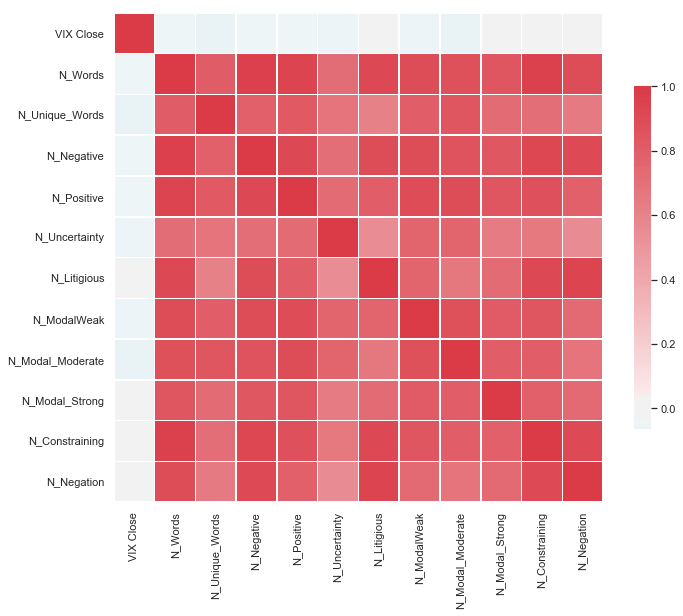

In [20]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.7})
plt.show()

In [21]:
lm_10X_vix.median()

VIX Open               19.26
VIX High               19.80
VIX Low                18.50
VIX Close              19.19
N_Words             10190.00
N_Unique_Words       1352.00
N_Negative            136.00
N_Positive             54.00
N_Uncertainty         109.00
N_Litigious            85.00
N_ModalWeak            30.00
N_Modal_Moderate       30.00
N_Modal_Strong         28.00
N_Constraining         61.00
N_Negation              7.00
dtype: float64

# LSTM Model

In [22]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('vars%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Using TensorFlow backend.


In [23]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [24]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['VIX Close', 'N_Words', 'N_Unique_Words', 'N_Negative', 'N_Positive', 'N_Uncertainty', 'N_Litigious', 'N_ModalWeak', 'N_Modal_Moderate', 'N_Modal_Strong', 'N_Constraining', 'N_Negation']]
df.head()

,VIX Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,12.19,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,12.19,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,13.14,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,13.72,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,13.33,3822,897,77,39,23,60,5,12,19,32,2


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [26]:
n_weeks = 12 #adding 12 weeks (= one quarter) lags creating number of observations
n_features = 12 #features in the dataset
n_obs = n_weeks*n_features

In [27]:
reframed = series_to_supervised(scaled, n_weeks, 1)
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var8(t-12),var9(t-12),var10(t-12),...,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t)
12,0.042526,0.002158,0.084175,0.002345,0.000620,0.000114,0.000709,0.000945,0.001410,0.000909,...,0.307720,0.013276,0.020777,0.001155,0.011754,0.017173,0.009027,0.005050,0.007602,0.007610
13,0.042526,0.002915,0.098966,0.001828,0.002481,0.000079,0.000355,0.001103,0.002257,0.000909,...,0.165705,0.004931,0.012611,0.000431,0.001135,0.002994,0.003667,0.001717,0.002924,0.000692
14,0.055772,0.005173,0.142376,0.005414,0.004238,0.000332,0.001844,0.002363,0.004231,0.003131,...,0.066619,0.000828,0.001344,0.000069,0.000213,0.000158,0.000564,0.000707,0.000731,0.000000
15,0.063859,0.002678,0.088865,0.002379,0.001344,0.000114,0.000886,0.000630,0.001975,0.001616,...,0.055796,0.000690,0.001240,0.000069,0.000248,0.000158,0.000282,0.000505,0.000244,0.000346
16,0.058422,0.002716,0.107864,0.002655,0.004031,0.000114,0.001064,0.000788,0.003385,0.001919,...,0.044974,0.000241,0.000207,0.000020,0.000142,0.000315,0.000564,0.000000,0.000877,0.000000


In [28]:
print(reframed.head())

    var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
12    0.042526    0.002158    0.084175    0.002345    0.000620    0.000114   
13    0.042526    0.002915    0.098966    0.001828    0.002481    0.000079   
14    0.055772    0.005173    0.142376    0.005414    0.004238    0.000332   
15    0.063859    0.002678    0.088865    0.002379    0.001344    0.000114   
16    0.058422    0.002716    0.107864    0.002655    0.004031    0.000114   

    var7(t-12)  var8(t-12)  var9(t-12)  var10(t-12)  ...   var3(t)   var4(t)  \
12    0.000709    0.000945    0.001410     0.000909  ...  0.307720  0.013276   
13    0.000355    0.001103    0.002257     0.000909  ...  0.165705  0.004931   
14    0.001844    0.002363    0.004231     0.003131  ...  0.066619  0.000828   
15    0.000886    0.000630    0.001975     0.001616  ...  0.055796  0.000690   
16    0.001064    0.000788    0.003385     0.001919  ...  0.044974  0.000241   

     var5(t)   var6(t)   var7(t)   var8(t)   var9(

In [29]:
values = reframed.values
n_train_days = 715680 #1022399*.7
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(715680, 156)

In [30]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [31]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_weeks, n_features))
test_X = test_X.reshape((test_X.shape[0], n_weeks, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(715680, 12, 12) (715680,) (306707, 12, 12) (306707,)


In [32]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))# number of units?, stateful=True?
model.add(Dense(1)) #single output value
model.compile(loss='mae', optimizer='adam', metrics=['mse','mape']) #metrics=['mse', 'mape'] to further check optimal epoch size
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=21470, validation_data=(test_X, test_y), verbose=2, shuffle=False, validation_split=0.2)
# plot history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 715680 samples, validate on 306707 samples
Epoch 1/50
 - 7s - loss: 0.1552 - mean_squared_error: 0.0414 - mean_absolute_percentage_error: 138.8796 - val_loss: 0.1568 - val_mean_squared_error: 0.0319 - val_mean_absolute_percentage_error: 378174.4899
Epoch 2/50
 - 5s - loss: 0.1263 - mean_squared_error: 0.0288 - mean_absolute_percentage_error: 132.8446 - val_loss: 0.1497 - val_mean_squared_error: 0.0286 - val_mean_absolute_percentage_error: 359366.7857
Epoch 3/50
 - 5s - loss: 0.1161 - mean_squared_error: 0.0243 - mean_absolute_percentage_error: 123.1018 - val_loss: 0.1370 - val_mean_squared_error: 0.0240 - val_mean_absolute_percentage_error: 330694.1172
Epoch 4/50
 - 5s - loss: 0.1075 - mean_squared_error: 0.0208 - mean_absolute_percentage_error: 114.1055 - val_loss: 0.1267 - val_mean_squared_error: 0.0204 - val_mean_absolute_percentage_error: 306785.8419
Epoc

 - 5s - loss: 0.0075 - mean_squared_error: 1.4282e-04 - mean_absolute_percentage_error: 6.0463 - val_loss: 0.0079 - val_mean_squared_error: 1.5251e-04 - val_mean_absolute_percentage_error: 14495.3244
Epoch 38/50
 - 5s - loss: 0.0072 - mean_squared_error: 1.3500e-04 - mean_absolute_percentage_error: 5.7858 - val_loss: 0.0077 - val_mean_squared_error: 1.3928e-04 - val_mean_absolute_percentage_error: 15015.0122
Epoch 39/50
 - 5s - loss: 0.0069 - mean_squared_error: 1.2816e-04 - mean_absolute_percentage_error: 5.5483 - val_loss: 0.0077 - val_mean_squared_error: 1.2827e-04 - val_mean_absolute_percentage_error: 15752.5092
Epoch 40/50
 - 5s - loss: 0.0067 - mean_squared_error: 1.2068e-04 - mean_absolute_percentage_error: 5.3309 - val_loss: 0.0076 - val_mean_squared_error: 1.1918e-04 - val_mean_absolute_percentage_error: 16375.4688
Epoch 41/50
 - 5s - loss: 0.0064 - mean_squared_error: 1.1430e-04 - mean_absolute_percentage_error: 5.1466 - val_loss: 0.0076 - val_mean_squared_error: 1.1215e-04 -

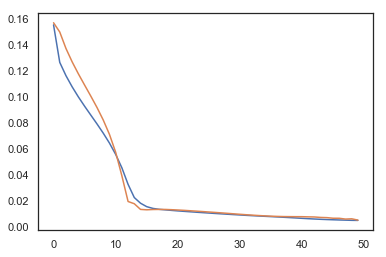

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend
plt.show()

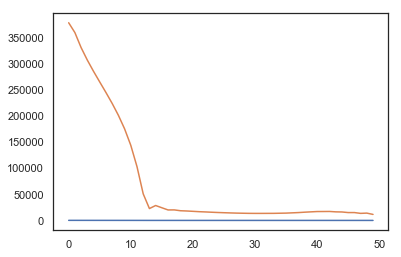

In [34]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend
plt.show()

In [35]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_weeks * n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -11:]), axis=1) #-11 für Anzahl der Features (12-11=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -11:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae =(mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)
mape =(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % mape)

Test MSE: 0.283
Test RMSE: 0.532
Test MAE: 0.360
Test MAPE: 2.300


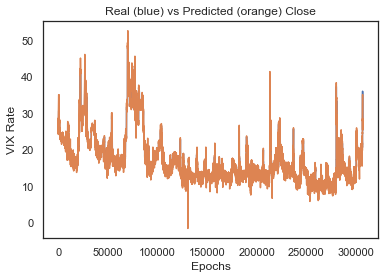

In [36]:
plt.plot(inv_y, label='Real')#blue
plt.plot(inv_yhat, label='Predicted')#orange
plt.title('Real (blue) vs Predicted (orange) Close')
plt.ylabel('VIX Rate')
plt.xlabel('Epochs')
plt.show()